<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test5_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

h2oframe에서 fraction은 어렵다.
--> pandas dataframe에서 필터링해서 h2oframe으로...

hf = h2o.H2OFrame(df)


Candel, A., Parmar, V., LeDell, E., and Arora, A. (Jun 2020). Deep Learning
with H2O. http://h2o.ai/resources.

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [ ]:
!nvidia-smi

Mon Jun 29 02:00:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    35W /  70W |    127MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!pip install h2o

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import urllib
import h2o
from h2o.automl import H2OAutoML
import sys
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sys: {}'.format(sys.version))

matplotlib: 3.2.2
seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5
sys: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,31 mins 30 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_587366
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [ ]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_NVOC_SORT.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
print(df.shape)
print(type(df))
df.dtypes


(1829693, 9)
<class 'pandas.core.frame.DataFrame'>


Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                     float64
dtype: object

In [ ]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_on = df[(df['nvoc'] > 0)]
df_on.shape

(1830, 9)

In [ ]:
df_off = df[(df['nvoc'] == 0)]
df_off.shape

(1827862, 9)

In [ ]:
df_off = df_off[(df_off['a2.buffer_overflow'] > 0) | (df_off['a2.pts_advanced_error'] > 0) | (df_off['a2.stb_rtp_errcnt'] > 0) | (df_off['a2.no_stream_error'] > 0) | (df_off['a2.not_decoding_error'] > 0)]
df_off.shape

(55717, 9)

In [ ]:
df_off = df_off.sample(n=2400)
print(df_off.shape)
df_off.head()

(2400, 9)


,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
457292,248758,162E4E407765670983D0C16BB5698624E8EC9DEA,2020-06-08 11:30:00,0.0,0.0,15.0,0.0,0.0,0.0
469221,260687,1813A025AD822D6EF349055275959E05F516AB27,2020-06-03 07:40:00,0.0,0.0,1.0,0.0,0.0,0.0
1178026,1090462,6A4E3CD003800C6867C5D66F72F06B2A97B777C6,2020-06-05 13:50:00,0.0,0.0,0.0,307.0,0.0,0.0
1632784,1622409,9F446B9DE3749FB82EC44695F8FE0548752BB3BF,2020-06-03 14:50:00,0.0,0.0,7.0,0.0,0.0,0.0
1106049,1009268,62E1EBC0DDB5E4551C0BE20F73D09F0614A924DD,2020-06-01 17:40:00,0.0,0.0,67.0,0.0,2.0,0.0


In [ ]:
df = pd.concat([df_on, df_off]).sample(frac = 1.0)
print(df.shape)
df.head(10)

(4230, 9)


,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
1433348,1386106,88C173B72AC8C4948CF9C4189083478485536EA0,2020-06-02 15:30:00,0.0,0.0,0.0,0.0,0.0,1.0
1508700,1479892,92B9896AB833C99234EDF7B1726C2F7D933AC9FC,2020-06-05 22:10:00,0.0,0.0,0.0,0.0,0.0,1.0
200672,2068063,CB1C1F7A5340CF5891CA2D894577B0EE4EE9B6D9,2020-06-02 09:40:00,0.0,0.0,893.0,0.0,0.0,1.0
134510,1307243,80E8FD407F4B43835D271886C8EAF2513D4BC631,2020-06-06 23:50:00,0.0,0.0,1.0,27.0,0.0,0.0
974314,860251,547D84C075F98F8DC08D840F4B15EEA923C6DE94,2020-06-06 21:50:00,0.0,0.0,40.0,0.0,0.0,0.0
1104118,1007337,62974214F1BE9C5DC214C0AA3C0418C2DE004856,2020-06-04 07:50:00,3.0,3.0,0.0,0.0,0.0,0.0
845358,705949,441010B3AEF45080947B5AC141ABB0F4446CB7D1,2020-06-07 09:10:00,0.0,0.0,19.0,54.0,0.0,0.0
156509,1522779,96C5C8FC9891C5DE2988670FB09FE63ABC1B76B0,2020-06-07 18:00:00,0.0,0.0,0.0,0.0,0.0,1.0
569252,376846,257E03DCE6FA721AC5CD319CDCD7BA72B09E7B0D,2020-06-01 23:30:00,0.0,0.0,42.0,0.0,0.0,0.0
1050852,947158,5C21CED274A70B8AE139551A529501AA9AE8B1F4,2020-06-02 10:10:00,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#hdf = h2o.import_file(OUTPUT_FILE)
hdf = h2o.H2OFrame(df)
print(type(hdf))
hdf.types

Parse progress: |█████████████████████████████████████████████████████████| 100%
<class 'h2o.frame.H2OFrame'>


{'Unnamed: 0': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'int'}

#4번: 비율 비슷하게 맞추어 학습

In [ ]:
hdf.describe()

Rows:4230
Cols:9




,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
type,int,enum,time,int,int,int,int,int,int
mins,660.0,,1590969600000.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
mean,1005172.1716312061,,1591291031063.8293,23.3016548463357,23.301418439716322,393.56193853427766,5.194799054373522,-0.009456264775413715,0.4326241134751773
maxs,2603101.0,,1591660200000.0,43005.0,43005.0,157649.0,600.0,15.0,1.0
sigma,600020.1395887776,,200414950.88148162,759.7168597864891,759.716866572236,4127.815051555915,40.82785286466467,0.2932284355977892,0.4954982665168158
zeros,0,,0,4051,4051,1520,3911,4136,2400
missing,0,0,0,0,0,0,0,0,0
0,1386106.0,88C173B72AC8C4948CF9C4189083478485536EA0,2020-06-02 15:30:00,0.0,0.0,0.0,0.0,0.0,1.0
1,1479892.0,92B9896AB833C99234EDF7B1726C2F7D933AC9FC,2020-06-05 22:10:00,0.0,0.0,0.0,0.0,0.0,1.0
2,2068063.0,CB1C1F7A5340CF5891CA2D894577B0EE4EE9B6D9,2020-06-02 09:40:00,0.0,0.0,893.0,0.0,0.0,1.0


In [ ]:
# 2진분류 시 target y는 factor(파이썬에서는 enum) 타입이어야...
hdf['nvoc'] = hdf['nvoc'].asfactor()
hdf.types

{'Unnamed: 0': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'enum'}

In [ ]:
data_train,data_test,data_valid = hdf.split_frame(ratios=[.7, .15])

In [ ]:
y = "nvoc"
x = hdf.columns
x.remove(y)
x.remove('Unnamed: 0')
x.remove('a1.ucube_jnr_no')
x.remove('a2.firstlogtime')
x

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

#Create model

In [ ]:
#aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "GBM", "DeepLearning", "GLM", "DRF" ], verbosity="info", nfolds=0)
aml = H2OAutoML(max_models = 20, seed = 20, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

# Train model

In [ ]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)
!nvidia-smi

AutoML progress: |
02:00:27.338: Project: AutoML_20200629_20027338
02:00:27.338: Cross-validation disabled by user: no fold column nor nfolds > 1.
02:00:27.338: Setting stopping tolerance adaptively based on the training frame: 0.018399022669872974
02:00:27.338: Build control seed: 20
02:00:27.338: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
02:00:27.358: training frame: Frame key: automl_training_py_101_sid_8800    cols: 9    rows: 2663  chunks: 1    size: 264519  checksum: -8187983702577364277
02:00:27.358: validation frame: Frame key: py_103_sid_8800    cols: 9    rows: 632  chunks: 1    size: 237845  checksum: 583476113473920744
02:00:27.361: leaderboard frame: Frame key: automl_leaderboard_py_101_sid_8800    cols: 9    rows: 291  chunks: 1    size: 233601  checksum: -8593849714227011582
02:00:27.361: blending frame: NULL
02:00:27.361: response column: nvoc
0

In [ ]:
leaderboard = aml.leaderboard
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_20200629_020027,0.97088,0.159659,0.974311,0.0566602,0.207481,0.0430484
XGBoost_1_AutoML_20200629_020027,0.969033,0.172508,0.972504,0.0578512,0.21625,0.0467641
XGBoost_grid__1_AutoML_20200629_020027_model_2,0.968887,0.163469,0.973087,0.052528,0.20958,0.0439238
GBM_5_AutoML_20200629_020027,0.968158,0.202602,0.9723,0.0619835,0.230491,0.0531262
GBM_2_AutoML_20200629_020027,0.96738,0.172508,0.972696,0.0513369,0.210879,0.04447
GBM_4_AutoML_20200629_020027,0.967137,0.170747,0.972735,0.052528,0.212068,0.044973
XGBoost_2_AutoML_20200629_020027,0.966553,0.174756,0.971436,0.0619835,0.218654,0.0478094
GBM_3_AutoML_20200629_020027,0.966505,0.176562,0.971597,0.052528,0.214429,0.04598
GBM_1_AutoML_20200629_020027,0.966262,0.181048,0.97276,0.053087,0.213943,0.0457717
XGBoost_grid__1_AutoML_20200629_020027_model_4,0.966091,0.161828,0.971021,0.0513369,0.209434,0.0438627


#Test

In [ ]:
print(data_test.head())
data_pred=aml.leader.predict(data_test)
data_pred.head()

Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
1.00734e+06,62974214F1BE9C5DC214C0AA3C0418C2DE004856,2020-06-04 07:50:00,3,3,0,0,0,0
171647,0FAF5FF5ADD8EEC1F4C70F30ED8EE21501674572,2020-06-08 23:40:00,0,0,2,0,0,0
1.78992e+06,AEF405052B557EF8FDBB55597C314C7FCE2ECA03,2020-06-06 21:20:00,0,0,147,0,0,0
594576,38AF9EEA189C2E41FA234EB4A9EE8F7E80DC3C7A,2020-06-01 23:20:00,0,0,5,0,0,0
834897,520C28B996E3FF1B91ACCC2697CD699D7F4DBEB9,2020-06-06 20:10:00,1,1,1,0,0,0
7614,009729B1A3B8CD7C3D2C868CAA380EE2C8783DB7,2020-06-05 21:00:00,0,0,1,0,0,0
261425,1813A025AD822D6EF349055275959E05F516AB27,2020-06-08 10:40:00,0,0,1,0,0,1
781864,4C369F13ECD4C3FE93C3489861FB2E11864C24C8,2020-06-06 13:30:00,0,0,5,1,0,0
170614,0FAF5FF5ADD8EEC1F4C70F30ED8EE21501674572,2020-06-01 19:30:00,0,0,6,0,0,1
234839,150F29FC82EDD0131795F721E6E1C419295703F7,2020-06-07 19:40:00,0,0,229,0,0,0



xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
1,0.0417305,0.95827
0,0.964546,0.0354545
0,0.809535,0.190465
0,0.905679,0.0943214
0,0.985106,0.0148944
0,0.966235,0.0337654
0,0.966235,0.0337654
0,0.822073,0.177927
0,0.947799,0.0522012
0,0.743556,0.256444


In [ ]:
leader_result = pd.DataFrame()
df_test = h2o.as_list(data_test, use_pandas=True)
leader_result['ground truth'] = df_test['nvoc']
leader_result['predictions'] = h2o.as_list(data_pred['predict'], use_pandas=True)
leader_result.head(200)

,ground truth,predictions
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
195,1,0
196,0,0
197,1,1
198,0,0


# Performance check


In [ ]:
aml.leader.model_performance(data_test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.061083864419917436
RMSE: 0.2471515009461149
LogLoss: 0.224675652642715
Mean Per-Class Error: 0.07451857451857458
AUC: 0.9517524517524517
AUCPR: 0.9412021713411277
Gini: 0.9035049035049034

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5687440037727356: 


,,0,1,Error,Rate
0,0,402.0,5.0,0.0123,(5.0/407.0)
1,1,48.0,303.0,0.1368,(48.0/351.0)
2,Total,450.0,308.0,0.0699,(53.0/758.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.568744,0.919575,4.0
1,max f2,0.222822,0.908065,25.0
2,max f0point5,0.568744,0.957044,4.0
3,max accuracy,0.568744,0.930079,4.0
4,max precision,0.568744,0.983766,4.0
5,max recall,0.073505,1.000000,47.0
6,max specificity,0.980577,0.997543,0.0
7,max absolute_mcc,0.568744,0.863932,4.0
8,max min_per_class_accuracy,0.276251,0.900285,23.0
9,max mean_per_class_accuracy,0.568744,0.925481,4.0



Gains/Lift Table: Avg response rate: 46.31 %, avg score: 47.40 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.379947,0.977970,2.122052,2.122052,0.982639,0.978002,0.982639,0.978002,0.806268,0.806268,112.205207,112.205207
1,,2,0.403694,0.961550,2.159544,2.124257,1.000000,0.961550,0.983660,0.977034,0.051282,0.857550,115.954416,112.425749
2,,3,0.525066,0.155570,0.586833,1.768873,0.271739,0.281061,0.819095,0.816156,0.071225,0.928775,-41.316735,76.887285
3,,4,0.614776,0.128806,0.254064,1.547828,0.117647,0.137257,0.716738,0.717089,0.022792,0.951567,-74.593598,54.782779
4,,5,0.773087,0.092106,0.143970,1.260348,0.066667,0.098150,0.583618,0.590344,0.022792,0.974359,-85.603039,26.034830
5,,6,0.828496,0.085096,0.102835,1.182935,0.047619,0.085096,0.547771,0.556554,0.005698,0.980057,-89.716456,18.293502
6,,7,1.000000,0.073505,0.116283,1.000000,0.053846,0.075464,0.463061,0.474045,0.019943,1.000000,-88.371685,0.000000


#나머지 모델도 테스트

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

['XGBoost_grid__1_AutoML_20200625_075445_model_1',
 'GBM_grid__1_AutoML_20200625_075445_model_1',
 'XGBoost_2_AutoML_20200625_075445',
 'GBM_5_AutoML_20200625_075445',
 'GBM_1_AutoML_20200625_075445',
 'XGBoost_1_AutoML_20200625_075445',
 'XGBoost_grid__1_AutoML_20200625_075445_model_2',
 'XGBoost_3_AutoML_20200625_075445',
 'GBM_2_AutoML_20200625_075445',
 'XGBoost_grid__1_AutoML_20200625_075445_model_3',
 'XGBoost_grid__1_AutoML_20200625_075445_model_4',
 'GBM_4_AutoML_20200625_075445',
 'DRF_1_AutoML_20200625_075445',
 'GBM_3_AutoML_20200625_075445',
 'XRT_1_AutoML_20200625_075445',
 'GBM_grid__1_AutoML_20200625_075445_model_2',
 'DeepLearning_grid__1_AutoML_20200625_075445_model_1',
 'DeepLearning_1_AutoML_20200625_075445',
 'DeepLearning_grid__2_AutoML_20200625_075445_model_1',
 'GLM_1_AutoML_20200625_075445']

In [ ]:
drf = h2o.get_model([i for i in model_ids if "DRF" in i][0])

In [ ]:
#h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
h2o.get_model([i for i in model_ids if "GBM" in i][0])

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20200625_075445_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,65.0,65.0,9220.0,3.0,3.0,3.0,4.0,8.0,6.630769




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05722728365578829
RMSE: 0.2392222474097848
LogLoss: 0.21613479524646784
Mean Per-Class Error: 0.06393536612939688
AUC: 0.9573690203171937
AUCPR: 0.9714208776462332
Gini: 0.9147380406343875

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38265021299153756: 


,,0,1,Error,Rate
0,0,1463.0,29.0,0.0194,(29.0/1492.0)
1,1,162.0,1332.0,0.1084,(162.0/1494.0)
2,Total,1625.0,1361.0,0.064,(191.0/2986.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.382650,0.933100,78.0
1,max f2,0.193830,0.911921,118.0
2,max f0point5,0.608404,0.964808,38.0
3,max accuracy,0.382650,0.936035,78.0
4,max precision,0.973601,1.000000,0.0
5,max recall,0.102057,1.000000,152.0
6,max specificity,0.973601,1.000000,0.0
7,max absolute_mcc,0.382650,0.875558,78.0
8,max min_per_class_accuracy,0.206264,0.908177,112.0
9,max mean_per_class_accuracy,0.382650,0.936065,78.0



Gains/Lift Table: Avg response rate: 50.03 %, avg score: 49.95 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.021433,0.973601,1.998661,1.998661,1.000000,0.973601,1.000000,0.973601,0.042838,0.042838,99.866131,99.866131
1,,2,0.421299,0.956778,1.998661,1.998661,1.000000,0.956787,1.000000,0.957643,0.799197,0.842035,99.866131,99.866131
2,,3,0.501340,0.206264,0.852985,1.815751,0.426778,0.411162,0.908484,0.870396,0.068273,0.910308,-14.701484,81.575109
3,,4,0.652043,0.153589,0.213191,1.445360,0.106667,0.163968,0.723164,0.707123,0.032129,0.942436,-78.680946,44.535959
4,,5,0.746484,0.129772,0.255148,1.294781,0.127660,0.130068,0.647824,0.634117,0.024096,0.966533,-74.485175,29.478104
5,,6,0.823175,0.106757,0.174556,1.190415,0.087336,0.110038,0.595606,0.585291,0.013387,0.979920,-82.544443,19.041504
6,,7,0.984260,0.102057,0.124657,1.015992,0.062370,0.102070,0.508336,0.506207,0.020080,1.000000,-87.534337,1.599183
7,,8,1.000000,0.046585,0.000000,1.000000,0.000000,0.082089,0.500335,0.499531,0.000000,1.000000,-100.000000,0.000000




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.06365114622874744
RMSE: 0.25229178787417444
LogLoss: 0.23213996590554137
Mean Per-Class Error: 0.07097100745059925
AUC: 0.9527291869128603
AUCPR: 0.961743321160044
Gini: 0.9054583738257207

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5737464092526549: 


,,0,1,Error,Rate
0,0,337.0,6.0,0.0175,(6.0/343.0)
1,1,45.0,315.0,0.125,(45.0/360.0)
2,Total,382.0,321.0,0.0725,(51.0/703.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.573746,0.925110,15.0
1,max f2,0.206264,0.905817,46.0
2,max f0point5,0.938811,0.965625,4.0
3,max accuracy,0.843001,0.927454,7.0
4,max precision,0.986655,1.000000,0.0
5,max recall,0.096023,1.000000,67.0
6,max specificity,0.986655,1.000000,0.0
7,max absolute_mcc,0.843001,0.862999,7.0
8,max min_per_class_accuracy,0.221037,0.902778,42.0
9,max mean_per_class_accuracy,0.843001,0.929029,7.0



Gains/Lift Table: Avg response rate: 51.21 %, avg score: 51.67 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.017070,0.973601,1.952778,1.952778,1.000000,0.974688,1.000000,0.974688,0.033333,0.033333,95.277778,95.277778
1,,2,0.439545,0.956778,1.946203,1.946458,0.996633,0.956856,0.996764,0.957548,0.822222,0.855556,94.620277,94.645811
2,,3,0.506401,0.221037,0.706324,1.782733,0.361702,0.484496,0.912921,0.895095,0.047222,0.902778,-29.367612,78.273252
3,,4,0.655761,0.153589,0.260370,1.435991,0.133333,0.169673,0.735358,0.729869,0.038889,0.941667,-73.962963,43.599060
4,,5,0.749644,0.129772,0.325463,1.296911,0.166667,0.130493,0.664137,0.654804,0.030556,0.972222,-67.453704,29.691124
5,,6,0.829303,0.106757,0.104613,1.182385,0.053571,0.109605,0.605489,0.602435,0.008333,0.980556,-89.538690,18.238517
6,,7,0.977240,0.102057,0.093884,1.017605,0.048077,0.102076,0.521106,0.526690,0.013889,0.994444,-90.611645,1.760472
7,,8,1.000000,0.046585,0.244097,1.000000,0.125000,0.088740,0.512091,0.516722,0.005556,1.000000,-75.590278,0.000000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-25 07:55:01,0.010 sec,0.0,0.500000,0.693147,0.500000,0.500335,1.000000,0.499665,0.499992,0.693131,0.500000,0.512091,1.000000,0.487909
1,,2020-06-25 07:55:01,0.035 sec,5.0,0.386206,0.485730,0.940757,0.958424,1.998661,0.075687,0.385874,0.485250,0.937071,0.959030,1.952778,0.073969
2,,2020-06-25 07:55:01,0.058 sec,10.0,0.321147,0.376569,0.950276,0.965285,1.998661,0.072338,0.321831,0.377686,0.946639,0.964020,1.952778,0.072546
3,,2020-06-25 07:55:01,0.089 sec,15.0,0.281182,0.306979,0.950361,0.964658,1.998661,0.071668,0.283560,0.310066,0.950190,0.965715,1.952778,0.073969
4,,2020-06-25 07:55:01,0.124 sec,20.0,0.263509,0.273139,0.953656,0.968779,0.000000,0.070663,0.267489,0.277839,0.951276,0.966580,1.952778,0.073969
5,,2020-06-25 07:55:01,0.154 sec,25.0,0.252297,0.247270,0.953871,0.968974,1.998661,0.070328,0.257407,0.253288,0.951166,0.966530,1.952778,0.072546
6,,2020-06-25 07:55:01,0.177 sec,30.0,0.249879,0.241766,0.954750,0.969365,1.998661,0.069324,0.255702,0.248488,0.953312,0.967712,1.952778,0.072546
7,,2020-06-25 07:55:01,0.202 sec,35.0,0.247623,0.236688,0.954627,0.969341,1.998661,0.068319,0.254553,0.244659,0.953499,0.967796,1.952778,0.073969
8,,2020-06-25 07:55:01,0.227 sec,40.0,0.245972,0.232190,0.954774,0.969429,1.998661,0.068319,0.253067,0.240344,0.953482,0.967787,1.952778,0.072546
9,,2020-06-25 07:55:01,0.243 sec,45.0,0.243048,0.224181,0.955814,0.970366,1.998661,0.067314,0.252093,0.235467,0.952146,0.961358,1.952778,0.073969



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.stb_rtp_errcnt,2067.153076,1.000000,0.911307
1,a2.no_stream_error,144.184830,0.069750,0.063564
2,a2.not_decoding_error,31.522545,0.015249,0.013897
3,a2.buffer_overflow,13.711889,0.006633,0.006045
4,a2.pts_advanced_error,11.766886,0.005692,0.005187


In [ ]:
h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__1_AutoML_20200625_075445_model_1


Status of Neuron Layers: predicting nvoc, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,602 weights/biases, 24.9 KB, 3,045,720 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,5,Input,15,,,,,,,,,
1,,2,200,RectifierDropout,30,0,0,0.107314,0.259568,0,-0.0262809,1.16793,-0.0983838,0.19972
2,,3,2,Softmax,,0,0,0.0681107,0.236844,0,3.67788e-05,2.16203,0.275947,0.285247




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.18375282455886932
RMSE: 0.4286639996067658
LogLoss: 0.5637553499210695
Mean Per-Class Error: 0.07363457404237139
AUC: 0.9117596390925632
AUCPR: 0.9256156225866184
Gini: 0.8235192781851264

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5811222396740974: 


,,0,1,Error,Rate
0,0,1471.0,21.0,0.0141,(21.0/1492.0)
1,1,199.0,1295.0,0.1332,(199.0/1494.0)
2,Total,1670.0,1316.0,0.0737,(220.0/2986.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.581122,0.921708,55.0
1,max f2,0.581122,0.887959,55.0
2,max f0point5,0.613706,0.960507,44.0
3,max accuracy,0.613706,0.926323,44.0
4,max precision,0.999999,1.000000,0.0
5,max recall,0.000013,1.000000,399.0
6,max specificity,0.999999,1.000000,0.0
7,max absolute_mcc,0.613706,0.859646,44.0
8,max min_per_class_accuracy,0.581122,0.866801,55.0
9,max mean_per_class_accuracy,0.613706,0.926365,44.0



Gains/Lift Table: Avg response rate: 50.03 %, avg score: 51.63 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.021433,1.000000e+00,1.998661,1.998661,1.000000,1.000000,1.000000,1.000000,0.042838,0.042838,99.866131,99.866131
1,,2,0.030141,7.212889e-01,1.614303,1.887625,0.807692,0.809250,0.944444,0.944895,0.014056,0.056894,61.430337,88.762457
2,,3,0.436705,6.137065e-01,1.982198,1.975671,0.991763,0.614721,0.988497,0.637509,0.805890,0.862784,98.219787,97.567058
3,,4,0.516410,5.737274e-01,0.193148,1.700547,0.096639,0.574737,0.850843,0.627821,0.015395,0.878179,-80.685206,70.054711
4,,5,0.612525,4.913477e-01,0.194991,1.464301,0.097561,0.516550,0.732641,0.610361,0.018742,0.896921,-80.500865,46.430080
5,,6,0.702612,4.152113e-01,0.185749,1.300368,0.092937,0.429213,0.650620,0.587134,0.016734,0.913655,-81.425081,30.036830
6,,7,0.801072,3.934541e-01,0.217541,1.167278,0.108844,0.406330,0.584030,0.564912,0.021419,0.935074,-78.245863,16.727837
7,,8,0.899866,3.594171e-01,0.277780,1.069622,0.138983,0.372884,0.535169,0.543829,0.027443,0.962517,-72.221995,6.962224
8,,9,1.000000,2.396910e-52,0.374331,1.000000,0.187291,0.268829,0.500335,0.516293,0.037483,1.000000,-62.566878,0.000000




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.18494266098705592
RMSE: 0.43004960293791217
LogLoss: 0.5576195465866923
Mean Per-Class Error: 0.07541302235179792
AUC: 0.9051627793974734
AUCPR: 0.906431289891992
Gini: 0.8103255587949467

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5801341625448978: 


,,0,1,Error,Rate
0,0,336.0,7.0,0.0204,(7.0/343.0)
1,1,47.0,313.0,0.1306,(47.0/360.0)
2,Total,383.0,320.0,0.0768,(54.0/703.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,5.801342e-01,0.920588,15.0
1,max f2,5.801342e-01,0.889205,15.0
2,max f0point5,6.014072e-01,0.955882,13.0
3,max accuracy,6.014072e-01,0.923186,13.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.870492e-01,1.000000,182.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,6.014072e-01,0.852808,13.0
8,max min_per_class_accuracy,5.801342e-01,0.869444,15.0
9,max mean_per_class_accuracy,6.014072e-01,0.924587,13.0



Gains/Lift Table: Avg response rate: 51.21 %, avg score: 51.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015647,1.000000e+00,1.952778,1.952778,1.000000,1.000000,1.000000,1.000000,0.030556,0.030556,95.277778,95.277778
1,,2,0.021337,7.899456e-01,0.976389,1.692407,0.500000,0.889935,0.866667,0.970649,0.005556,0.036111,-2.361111,69.240741
2,,3,0.031294,6.266955e-01,0.836905,1.420202,0.428571,0.683132,0.727273,0.879166,0.008333,0.044444,-16.309524,42.020202
3,,4,0.450925,6.137065e-01,1.952778,1.915817,1.000000,0.613706,0.981073,0.632130,0.819444,0.863889,95.277778,91.581668
4,,5,0.516358,5.737274e-01,0.212258,1.699939,0.108696,0.575017,0.870523,0.624892,0.013889,0.877778,-78.774155,69.993878
5,,6,0.615932,4.913477e-01,0.195278,1.456691,0.100000,0.522435,0.745958,0.608329,0.019444,0.897222,-80.472222,45.669104
6,,7,0.701280,4.146784e-01,0.227824,1.307133,0.116667,0.428218,0.669371,0.586409,0.019444,0.916667,-77.217593,30.713320
7,,8,0.800853,3.972336e-01,0.111587,1.158486,0.057143,0.407525,0.593250,0.564167,0.011111,0.927778,-88.841270,15.848628
8,,9,0.899004,3.595414e-01,0.283011,1.062904,0.144928,0.375684,0.544304,0.543589,0.027778,0.955556,-71.698873,6.290436
9,,10,1.000000,1.098281e-13,0.440063,1.000000,0.225352,0.294477,0.512091,0.518430,0.044444,1.000000,-55.993740,0.000000




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-25 07:55:02,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-25 07:55:03,1.171 sec,27294 obs/sec,10.0,1,29860.0,0.490382,0.697938,0.038102,0.885244,0.858979,1.998661,0.082719,0.489972,0.673566,0.039150,0.883839,0.854515,1.952778,0.081081
2,,2020-06-25 07:55:08,6.202 sec,48982 obs/sec,100.0,10,298600.0,0.467246,0.637518,0.126725,0.906114,0.933287,1.998661,0.077696,0.466998,0.624064,0.127143,0.904142,0.917467,1.952778,0.075391
3,,2020-06-25 07:55:13,11.212 sec,62000 obs/sec,230.0,23,686780.0,0.470449,0.645041,0.114711,0.910320,0.943181,1.998661,0.075687,0.474561,0.643116,0.098642,0.906321,0.929840,1.952778,0.078236
4,,2020-06-25 07:55:18,16.328 sec,66507 obs/sec,360.0,36,1074960.0,0.446953,0.600036,0.200932,0.908524,0.941842,1.998661,0.077696,0.446066,0.587775,0.203635,0.903851,0.928784,1.952778,0.078236
5,,2020-06-25 07:55:24,21.510 sec,70047 obs/sec,500.0,50,1493000.0,0.446842,0.599295,0.201328,0.912692,0.926636,1.998661,0.071333,0.452247,0.595316,0.181411,0.900607,0.891633,1.952778,0.081081
6,,2020-06-25 07:55:29,26.760 sec,72016 obs/sec,640.0,64,1911040.0,0.433841,0.576137,0.247128,0.913723,0.942607,1.998661,0.074682,0.435342,0.566677,0.241467,0.908568,0.931296,1.952778,0.076814
7,,2020-06-25 07:55:34,32.072 sec,73204 obs/sec,780.0,78,2329080.0,0.484315,0.676825,0.061754,0.904771,0.917179,1.998661,0.072003,0.488250,0.667313,0.045889,0.881450,0.873023,1.952778,0.083926
8,,2020-06-25 07:55:40,37.368 sec,72460 obs/sec,900.0,90,2687400.0,0.439718,0.584897,0.226593,0.910634,0.924819,1.998661,0.072672,0.442701,0.580903,0.215605,0.902324,0.904408,1.952778,0.078236
9,,2020-06-25 07:55:45,42.576 sec,72050 obs/sec,1020.0,102,3045720.0,0.428664,0.563755,0.264988,0.911760,0.925616,1.998661,0.073677,0.430050,0.557620,0.259797,0.905163,0.906431,1.952778,0.076814



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.stb_rtp_errcnt,1.000000,1.000000,0.584069
1,a2.not_decoding_error,0.248026,0.248026,0.144864
2,a2.pts_advanced_error,0.181229,0.181229,0.105850
3,a2.buffer_overflow,0.168225,0.168225,0.098255
4,a2.no_stream_error,0.114647,0.114647,0.066962


In [ ]:
dl = h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
#dl = h2o.get_model([i for i in model_ids if "GBM" in i][0])

In [ ]:
dl.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5811222396740974: 


,,0,1,Error,Rate
0,0,1471.0,21.0,0.0141,(21.0/1492.0)
1,1,199.0,1295.0,0.1332,(199.0/1494.0)
2,Total,1670.0,1316.0,0.0737,(220.0/2986.0)


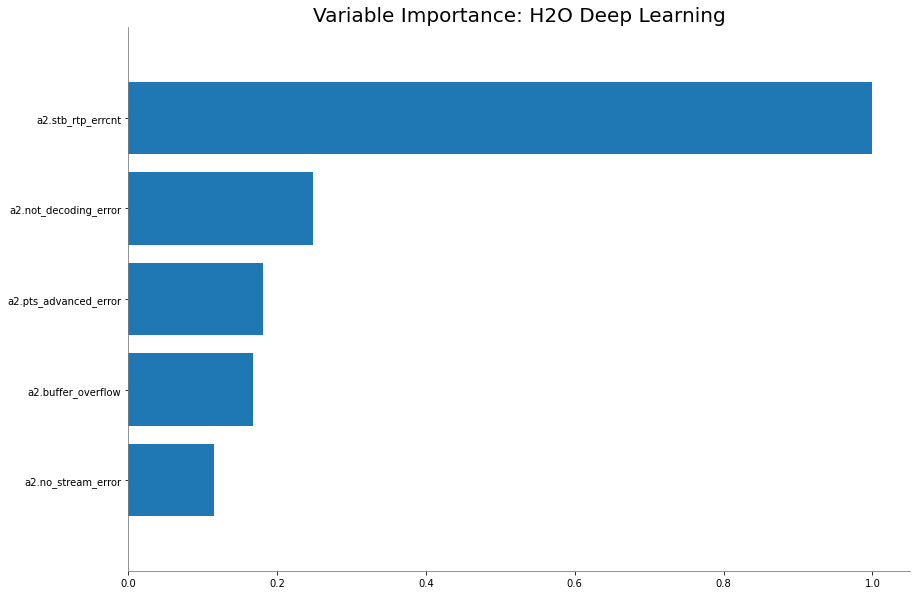

In [ ]:
dl.varimp_plot()

#모델 저장

In [ ]:
aml.leader.download_mojo(path = BASE_DIR)

'/content/XGBoost_grid__1_AutoML_20200625_075445_model_1.zip'